<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

### Done by Ng Chin Tiong Ryan (DL02/CSF03)

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.2.4-tf


## Step 1: Data Loading

In [2]:
import os
#base_dir is the directory where you stored the images
base_dir = 'C:/Users/maste/Desktop/DL/Assignment 1/Assigned_Images'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Steps 2 & 3:  Develop the Image Classification Models and Evaluate the Developed Models using Testing Images

### Model #0 (Base Model; Non-pretrain)

In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 82s 328ms/step - loss: 2.1756 - acc: 0.2040 - val_loss: 2.0052 - val_acc: 0.3010
Epoch 2/100
250/250 [==============================] - 65s 261ms/step - loss: 2.0014 - acc: 0.2927 - val_loss: 2.0350 - val_acc: 0.2980
Epoch 3/100
250/250 [==============================] - 65s 261ms/step - loss: 1.8865 - acc: 0.3355 - val_loss: 1.8033 - val_acc: 0.3930
Epoch 4/100
250/250 [==============================] - 64s 257ms/step - loss: 1.8259 - acc: 0.3565 - val_loss: 1.7429 - val_acc: 0.3890
Epoch 5/100
250/250 [==============================] - 63s 253ms/step - loss: 1.7726 - acc: 0.3816 - val_loss: 1.6656 - val_acc: 0.4355
Epoch 6/100
250/250 [==============================] - 63s 251ms

Epoch 57/100
250/250 [==============================] - 64s 256ms/step - loss: 0.9388 - acc: 0.6851 - val_loss: 1.1388 - val_acc: 0.6425
Epoch 58/100
250/250 [==============================] - 63s 252ms/step - loss: 0.9587 - acc: 0.6824 - val_loss: 1.1044 - val_acc: 0.6425
Epoch 59/100
250/250 [==============================] - 66s 265ms/step - loss: 0.9381 - acc: 0.6813 - val_loss: 1.5158 - val_acc: 0.5615
Epoch 60/100
250/250 [==============================] - 69s 277ms/step - loss: 0.9431 - acc: 0.6811 - val_loss: 1.2133 - val_acc: 0.6160
Epoch 61/100
250/250 [==============================] - 63s 250ms/step - loss: 0.9368 - acc: 0.6824 - val_loss: 1.0655 - val_acc: 0.6510
Epoch 62/100
250/250 [==============================] - 65s 260ms/step - loss: 0.9197 - acc: 0.6872 - val_loss: 1.1656 - val_acc: 0.6265
Epoch 63/100
250/250 [==============================] - 65s 262ms/step - loss: 0.9152 - acc: 0.6912 - val_loss: 1.2446 - val_acc: 0.5975
Epoch 64/100
250/250 [===================

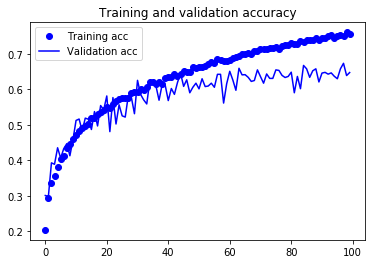

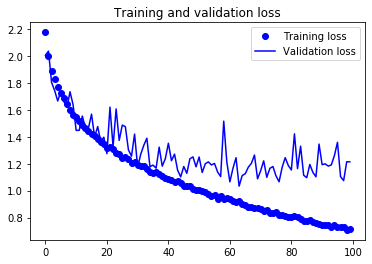

In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.642


In [8]:
# Save the Model
model.save('food_model_0.h5')

### Model #1

In [2]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [4]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=5e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 68s 272ms/step - loss: 2.3455 - acc: 0.2336 - val_loss: 1.9965 - val_acc: 0.3545
Epoch 2/100
250/250 [==============================] - 64s 258ms/step - loss: 1.9849 - acc: 0.3333 - val_loss: 2.1765 - val_acc: 0.3035
Epoch 3/100
250/250 [==============================] - 65s 259ms/step - loss: 1.8397 - acc: 0.3875 - val_loss: 1.7012 - val_acc: 0.4430
Epoch 4/100
250/250 [==============================] - 64s 257ms/step - loss: 1.7267 - acc: 0.4304 - val_loss: 1.6840 - val_acc: 0.4610
Epoch 5/100
250/250 [==============================] - 68s 270ms/step - loss: 1.6456 - acc: 0.4604 - val_loss: 1.5986 - val_acc: 0.4745
Epoch 6/100
250/250 [==============================] - 65s 258ms/step - loss: 1.5866 - acc: 0.4828 - val_loss: 1.5790 - val_acc: 0.5025
Epoc

Epoch 59/100
250/250 [==============================] - 65s 260ms/step - loss: 1.0437 - acc: 0.7053 - val_loss: 1.2817 - val_acc: 0.6440
Epoch 60/100
250/250 [==============================] - 65s 261ms/step - loss: 1.0399 - acc: 0.7020 - val_loss: 1.3566 - val_acc: 0.6350
Epoch 61/100
250/250 [==============================] - 66s 264ms/step - loss: 1.0519 - acc: 0.7031 - val_loss: 1.0604 - val_acc: 0.7090
Epoch 62/100
250/250 [==============================] - 67s 266ms/step - loss: 1.0569 - acc: 0.7059 - val_loss: 1.2712 - val_acc: 0.6350
Epoch 63/100
250/250 [==============================] - 68s 273ms/step - loss: 1.0373 - acc: 0.7020 - val_loss: 1.4759 - val_acc: 0.6070
Epoch 64/100
250/250 [==============================] - 68s 272ms/step - loss: 1.0481 - acc: 0.7104 - val_loss: 1.2144 - val_acc: 0.6540
Epoch 65/100
250/250 [==============================] - 77s 307ms/step - loss: 1.0556 - acc: 0.7004 - val_loss: 1.3066 - val_acc: 0.6650
Epoch 66/100
250/250 [===================

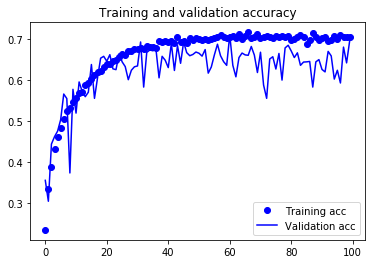

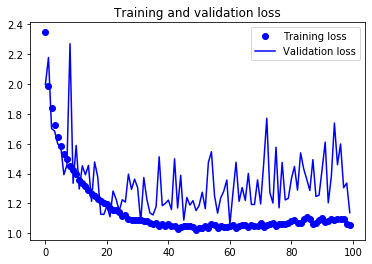

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.68


In [8]:
# Save the Model
model.save('food_model_1.h5')

### Model #2

In [4]:
# Build the Model 
from tensorflow.keras import layers, models, regularizers
img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [5]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=75, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=100) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 100 steps
Epoch 1/100
100/100 [==============================] - 67s 668ms/step - loss: 2.2579 - acc: 0.1528 - val_loss: 2.1551 - val_acc: 0.2240
Epoch 2/100
100/100 [==============================] - 64s 643ms/step - loss: 2.1140 - acc: 0.2337 - val_loss: 2.0524 - val_acc: 0.2555
Epoch 3/100
100/100 [==============================] - 65s 653ms/step - loss: 2.0498 - acc: 0.2595 - val_loss: 1.9640 - val_acc: 0.3205
Epoch 4/100
100/100 [==============================] - 70s 699ms/step - loss: 1.9970 - acc: 0.2864 - val_loss: 1.9849 - val_acc: 0.3040
Epoch 5/100
100/100 [==============================] - 68s 676ms/step - loss: 1.9456 - acc: 0.3120 - val_loss: 1.9717 - val_acc: 0.3130
Epoch 6/100
100/100 [==============================] - 67s 669ms/step - loss: 1.9113 - acc: 0.3253 - val_loss: 1.8617 - val_acc: 0.3460
Epoc

Epoch 59/100
100/100 [==============================] - 74s 739ms/step - loss: 1.2421 - acc: 0.5817 - val_loss: 1.4780 - val_acc: 0.5215
Epoch 60/100
100/100 [==============================] - 65s 646ms/step - loss: 1.2484 - acc: 0.5815 - val_loss: 1.3080 - val_acc: 0.5725
Epoch 61/100
100/100 [==============================] - 72s 724ms/step - loss: 1.2417 - acc: 0.5768 - val_loss: 1.4102 - val_acc: 0.5455
Epoch 62/100
100/100 [==============================] - 74s 736ms/step - loss: 1.2198 - acc: 0.5869 - val_loss: 1.2828 - val_acc: 0.5805
Epoch 63/100
100/100 [==============================] - 74s 738ms/step - loss: 1.2331 - acc: 0.5836 - val_loss: 1.3077 - val_acc: 0.5710
Epoch 64/100
100/100 [==============================] - 76s 757ms/step - loss: 1.2270 - acc: 0.5895 - val_loss: 1.2907 - val_acc: 0.5820
Epoch 65/100
100/100 [==============================] - 70s 700ms/step - loss: 1.2306 - acc: 0.5827 - val_loss: 1.4270 - val_acc: 0.5495
Epoch 66/100
100/100 [===================

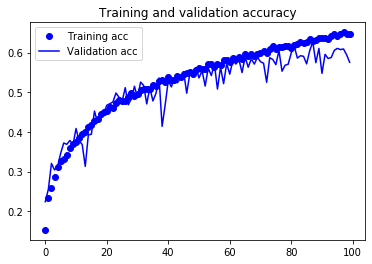

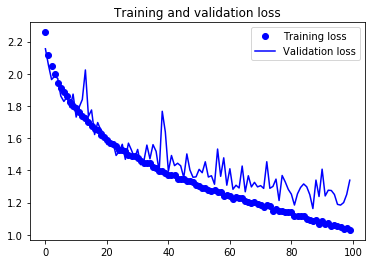

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.57


In [9]:
# Save the Model
model.save('food_model_2.h5')

### Model #3

In [7]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 256)      

In [8]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 63s 254ms/step - loss: 2.3936 - acc: 0.1603 - val_loss: 2.0188 - val_acc: 0.3155
Epoch 2/100
250/250 [==============================] - 61s 243ms/step - loss: 2.0419 - acc: 0.2788 - val_loss: 1.8896 - val_acc: 0.3270
Epoch 3/100
250/250 [==============================] - 61s 243ms/step - loss: 1.8953 - acc: 0.3307 - val_loss: 1.8895 - val_acc: 0.3620
Epoch 4/100
250/250 [==============================] - 60s 242ms/step - loss: 1.8049 - acc: 0.3715 - val_loss: 1.6428 - val_acc: 0.4510
Epoch 5/100
250/250 [==============================] - 66s 265ms/step - loss: 1.7391 - acc: 0.4045 - val_loss: 1.5675 - val_acc: 0.4915
Epoch 6/100
250/250 [==============================] - 65s 259ms/step - loss: 1.6723 - acc: 0.4325 - val_loss: 1.6925 - val_acc: 0.4445
Epoc

Epoch 59/100
250/250 [==============================] - 61s 244ms/step - loss: 1.1766 - acc: 0.6504 - val_loss: 1.3686 - val_acc: 0.6245
Epoch 60/100
250/250 [==============================] - 62s 247ms/step - loss: 1.1672 - acc: 0.6489 - val_loss: 1.4074 - val_acc: 0.6125
Epoch 61/100
250/250 [==============================] - 61s 243ms/step - loss: 1.1938 - acc: 0.6456 - val_loss: 1.3320 - val_acc: 0.6135
Epoch 62/100
250/250 [==============================] - 61s 243ms/step - loss: 1.1777 - acc: 0.6500 - val_loss: 1.2277 - val_acc: 0.6475
Epoch 63/100
250/250 [==============================] - 60s 242ms/step - loss: 1.1750 - acc: 0.6584 - val_loss: 1.3318 - val_acc: 0.6255
Epoch 64/100
250/250 [==============================] - 61s 243ms/step - loss: 1.2073 - acc: 0.6407 - val_loss: 1.1976 - val_acc: 0.6390
Epoch 65/100
250/250 [==============================] - 62s 246ms/step - loss: 1.2049 - acc: 0.6419 - val_loss: 1.4624 - val_acc: 0.5775
Epoch 66/100
250/250 [===================

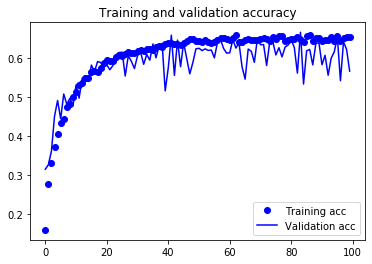

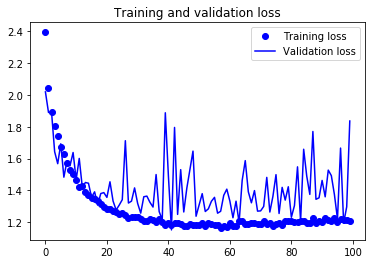

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.598


In [12]:
model.save('food_model_3.h5')

### Model #4 

In [4]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)      

In [5]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=30, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/30
250/250 [==============================] - 83s 332ms/step - loss: 2.2958 - acc: 0.1675 - val_loss: 2.1209 - val_acc: 0.2895
Epoch 2/30
250/250 [==============================] - 73s 294ms/step - loss: 2.0593 - acc: 0.2831 - val_loss: 1.9371 - val_acc: 0.3640
Epoch 3/30
250/250 [==============================] - 76s 304ms/step - loss: 1.9293 - acc: 0.3401 - val_loss: 1.8028 - val_acc: 0.4070
Epoch 4/30
250/250 [==============================] - 73s 290ms/step - loss: 1.8533 - acc: 0.3733 - val_loss: 1.7773 - val_acc: 0.3990
Epoch 5/30
250/250 [==============================] - 66s 262ms/step - loss: 1.7882 - acc: 0.3929 - val_loss: 1.8087 - val_acc: 0.3920
Epoch 6/30
250/250 [==============================] - 67s 266ms/step 

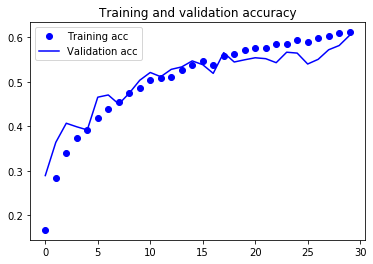

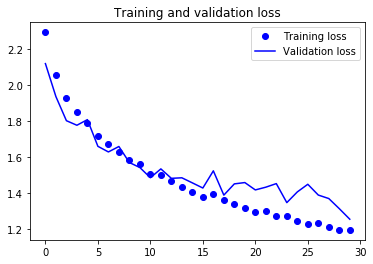

In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.558


In [9]:
model.save('food_model_4.h5')

### Model #5

In [10]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)      

In [11]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=5e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 69s 275ms/step - loss: 2.2157 - acc: 0.1943 - val_loss: 2.0298 - val_acc: 0.2865
Epoch 2/100
250/250 [==============================] - 65s 262ms/step - loss: 1.9781 - acc: 0.2951 - val_loss: 1.8296 - val_acc: 0.3695
Epoch 3/100
250/250 [==============================] - 66s 264ms/step - loss: 1.8320 - acc: 0.3643 - val_loss: 1.7183 - val_acc: 0.4220
Epoch 4/100
250/250 [==============================] - 68s 272ms/step - loss: 1.7296 - acc: 0.3944 - val_loss: 1.7026 - val_acc: 0.4150
Epoch 5/100
250/250 [==============================] - 68s 274ms/step - loss: 1.6406 - acc: 0.4356 - val_loss: 1.6022 - val_acc: 0.4490
Epoch 6/100
250/250 [==============================] - 68s 273ms/step - loss: 1.5845 - acc: 0.4567 - val_loss: 1.6382 - val_acc: 0.4740
Epoc

Epoch 59/100
250/250 [==============================] - 69s 277ms/step - loss: 0.7328 - acc: 0.7691 - val_loss: 1.1367 - val_acc: 0.6810
Epoch 60/100
250/250 [==============================] - 68s 272ms/step - loss: 0.7035 - acc: 0.7775 - val_loss: 1.1178 - val_acc: 0.6795
Epoch 61/100
250/250 [==============================] - 68s 271ms/step - loss: 0.6861 - acc: 0.7865 - val_loss: 1.0462 - val_acc: 0.7070
Epoch 62/100
250/250 [==============================] - 66s 265ms/step - loss: 0.6844 - acc: 0.7825 - val_loss: 1.1901 - val_acc: 0.6765
Epoch 63/100
250/250 [==============================] - 70s 281ms/step - loss: 0.6806 - acc: 0.7845 - val_loss: 1.2207 - val_acc: 0.6810
Epoch 64/100
250/250 [==============================] - 67s 268ms/step - loss: 0.6886 - acc: 0.7813 - val_loss: 1.2033 - val_acc: 0.6730
Epoch 65/100
250/250 [==============================] - 69s 274ms/step - loss: 0.6835 - acc: 0.7839 - val_loss: 1.1219 - val_acc: 0.6865
Epoch 66/100
250/250 [===================

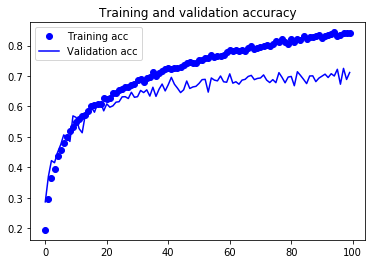

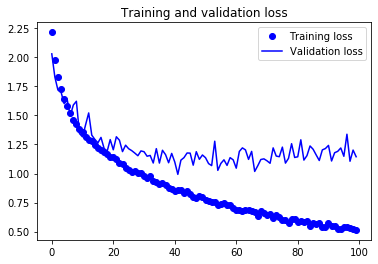

In [12]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.712


In [14]:
model.save('food_model_5.h5')

### Model #6

In [3]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [4]:
#Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-2,momentum=0.7),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 63s 253ms/step - loss: 2.5127 - acc: 0.1555 - val_loss: 2.4269 - val_acc: 0.2180
Epoch 2/100
250/250 [==============================] - 63s 253ms/step - loss: 2.3884 - acc: 0.2192 - val_loss: 2.3226 - val_acc: 0.2800
Epoch 3/100
250/250 [==============================] - 61s 245ms/step - loss: 2.2744 - acc: 0.2700 - val_loss: 2.1751 - val_acc: 0.3465
Epoch 4/100
250/250 [==============================] - 61s 242ms/step - loss: 2.1854 - acc: 0.3009 - val_loss: 2.0429 - val_acc: 0.3860
Epoch 5/100
250/250 [==============================] - 61s 242ms/step - loss: 2.0955 - acc: 0.3397 - val_loss: 2.1170 - val_acc: 0.3610
Epoch 6/100
250/250 [==============================] - 64s 256ms

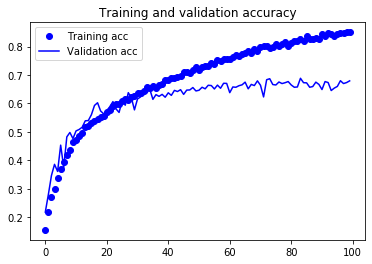

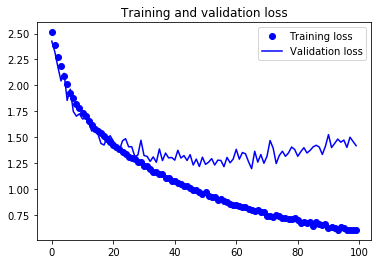

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.674


In [ ]:
model.save('food_model_6.h5')

### Model #7

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

In [8]:
#Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-2,momentum=0.5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 66s 265ms/step - loss: 2.5427 - acc: 0.1365 - val_loss: 2.5030 - val_acc: 0.1635
Epoch 2/100
250/250 [==============================] - 65s 260ms/step - loss: 2.4708 - acc: 0.1883 - val_loss: 2.4099 - val_acc: 0.2340
Epoch 3/100
250/250 [==============================] - 64s 257ms/step - loss: 2.3834 - acc: 0.2343 - val_loss: 2.3163 - val_acc: 0.2695
Epoch 4/100
250/250 [==============================] - 65s 260ms/step - loss: 2.2696 - acc: 0.2789 - val_loss: 2.3327 - val_acc: 0.2765
Epoch 5/100
250/250 [==============================] - 64s 256ms/step - loss: 2.1926 - acc: 0.3060 - val_loss: 2.1148 - val_acc: 0.3640
Epoch 6/100
250/250 [==============================] - 67s 269ms/step - loss: 2.1344 - acc: 0.3283 - val_loss: 2.0642 - val_acc: 0.3725
Epoc

Epoch 59/100
250/250 [==============================] - 67s 270ms/step - loss: 0.9849 - acc: 0.7201 - val_loss: 1.2411 - val_acc: 0.6480
Epoch 60/100
250/250 [==============================] - 68s 272ms/step - loss: 0.9736 - acc: 0.7188 - val_loss: 1.2563 - val_acc: 0.6545
Epoch 61/100
250/250 [==============================] - 68s 273ms/step - loss: 0.9644 - acc: 0.7195 - val_loss: 1.2724 - val_acc: 0.6515
Epoch 62/100
250/250 [==============================] - 67s 269ms/step - loss: 0.9467 - acc: 0.7356 - val_loss: 1.2707 - val_acc: 0.6510
Epoch 63/100
250/250 [==============================] - 67s 270ms/step - loss: 0.9289 - acc: 0.7349 - val_loss: 1.2487 - val_acc: 0.6570
Epoch 64/100
250/250 [==============================] - 68s 271ms/step - loss: 0.9441 - acc: 0.7268 - val_loss: 1.1567 - val_acc: 0.6695
Epoch 65/100
250/250 [==============================] - 70s 279ms/step - loss: 0.9091 - acc: 0.7363 - val_loss: 1.2227 - val_acc: 0.6620
Epoch 66/100
250/250 [===================

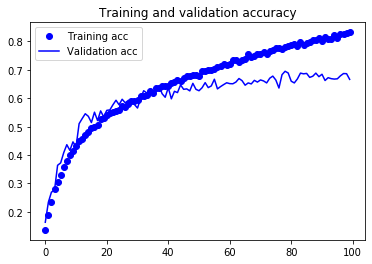

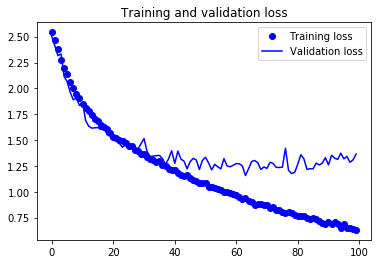

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.644


In [ ]:
model.save('food_model_7.h5')

### Model #8

In [9]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)      

In [10]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=5e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=50, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/50
250/250 [==============================] - 76s 303ms/step - loss: 2.2829 - acc: 0.1636 - val_loss: 2.1040 - val_acc: 0.2625
Epoch 2/50
250/250 [==============================] - 74s 294ms/step - loss: 2.0119 - acc: 0.2788 - val_loss: 1.8654 - val_acc: 0.3500
Epoch 3/50
250/250 [==============================] - 67s 268ms/step - loss: 1.8608 - acc: 0.3433 - val_loss: 1.7870 - val_acc: 0.3960
Epoch 4/50
250/250 [==============================] - 68s 271ms/step - loss: 1.7649 - acc: 0.3836 - val_loss: 1.7543 - val_acc: 0.3950
Epoch 5/50
250/250 [==============================] - 70s 279ms/step - loss: 1.6793 - acc: 0.4205 - val_loss: 1.5473 - val_acc: 0.4840
Epoch 6/50
250/250 [==============================] - 68s 272ms/step - loss: 1.5698 - acc: 0.4587 - val_loss: 1.5844 - val_acc: 0.4830
Epoch 7/50

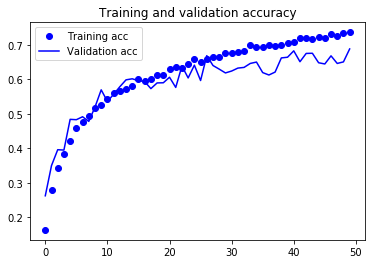

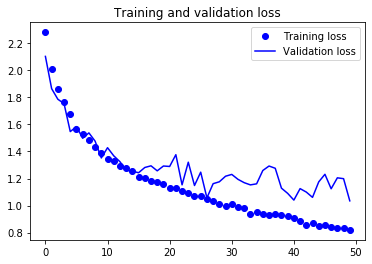

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.696


In [13]:
# Save the Model
model.save('food_model_8.h5')

### Model #9 (VGG16 Fine tuning 2)

In [3]:
# Build the Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base) #VGG16 pretrained
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
_________________________________________________________________


In [4]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=5e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=50, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/50
250/250 [==============================] - 88s 354ms/step - loss: 2.4497 - acc: 0.0973 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 2/50
250/250 [==============================] - 82s 329ms/step - loss: 2.3136 - acc: 0.1177 - val_loss: 2.1715 - val_acc: 0.1845
Epoch 3/50
250/250 [==============================] - 84s 335ms/step - loss: 2.0039 - acc: 0.2884 - val_loss: 1.6081 - val_acc: 0.4460
Epoch 4/50
250/250 [==============================] - 83s 333ms/step - loss: 1.6232 - acc: 0.4555 - val_loss: 1.4853 - val_acc: 0.5175
Epoch 5/50
250/250 [==============================] - 83s 333ms/step - loss: 1.4010 - acc: 0.5503 - val_loss: 1.3259 - val_acc: 0.6055
Epoch 6/50
250/250 [==============================] - 84s 338ms/step 

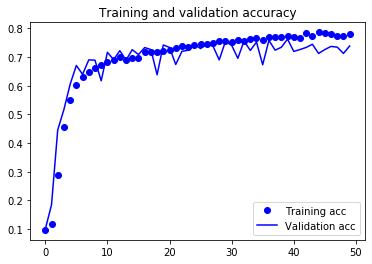

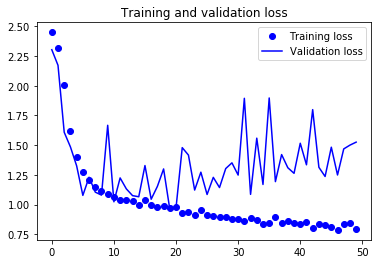

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.746


In [8]:
# Save the Model
model.save('food_model_9.h5')

### Model #10 (VGG 16 Base Model)

In [3]:
# Build the Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base) #VGG16 pretrained
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________


In [4]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 101s 403ms/step - loss: 1.9870 - acc: 0.3085 - val_loss: 1.5610 - val_acc: 0.4735
Epoch 2/100
250/250 [==============================] - 91s 363ms/step - loss: 1.6867 - acc: 0.4193 - val_loss: 1.3771 - val_acc: 0.5535
Epoch 3/100
250/250 [==============================] - 86s 344ms/step - loss: 1.5767 - acc: 0.4588 - val_loss: 1.2754 - val_acc: 0.5785
Epoch 4/100
250/250 [==============================] - 88s 354ms/step - loss: 1.5051 - acc: 0.4963 - val_loss: 1.2027 - val_acc: 0.6035
Epoch 5/100
250/250 [==============================] - 91s 366ms/step - loss: 1.4679 - acc: 0.5036 - val_loss: 1.2093 - val_acc: 0.5905
Epoch 6/100
250/250 [==============================] - 89s 355m

Epoch 57/100
250/250 [==============================] - 87s 347ms/step - loss: 1.0937 - acc: 0.6387 - val_loss: 1.0768 - val_acc: 0.6685
Epoch 58/100
250/250 [==============================] - 88s 353ms/step - loss: 1.0949 - acc: 0.6472 - val_loss: 1.0551 - val_acc: 0.6730
Epoch 59/100
250/250 [==============================] - 88s 351ms/step - loss: 1.0592 - acc: 0.6567 - val_loss: 1.0510 - val_acc: 0.6730
Epoch 60/100
250/250 [==============================] - 87s 349ms/step - loss: 1.0822 - acc: 0.6464 - val_loss: 1.0535 - val_acc: 0.6745
Epoch 61/100
250/250 [==============================] - 89s 356ms/step - loss: 1.0862 - acc: 0.6521 - val_loss: 1.0487 - val_acc: 0.6865
Epoch 62/100
250/250 [==============================] - 90s 360ms/step - loss: 1.0894 - acc: 0.6453 - val_loss: 1.0629 - val_acc: 0.6810
Epoch 63/100
250/250 [==============================] - 88s 352ms/step - loss: 1.0718 - acc: 0.6448 - val_loss: 1.0621 - val_acc: 0.6760
Epoch 64/100
250/250 [===================

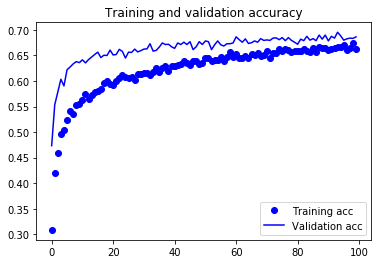

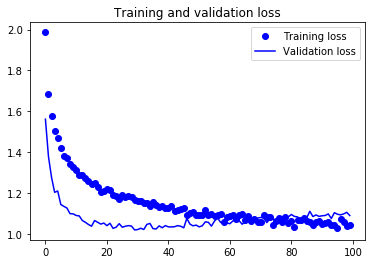

In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.678


In [8]:
# Save the Model
model.save('food_model_10.h5')

### Model #11 (VGG16 Fine Tuning)

In [17]:
# Build the Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))


model = models.Sequential()
model.add(conv_base) #VGG16 pretrained
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2570      
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
_________________________________________________________________


In [12]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=5e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 86s 344ms/step - loss: 2.2948 - acc: 0.1792 - val_loss: 1.8669 - val_acc: 0.3520
Epoch 2/100
250/250 [==============================] - 83s 333ms/step - loss: 1.7658 - acc: 0.4095 - val_loss: 1.4064 - val_acc: 0.5420
Epoch 3/100
250/250 [==============================] - 85s 338ms/step - loss: 1.4761 - acc: 0.5187 - val_loss: 1.3700 - val_acc: 0.5730
Epoch 4/100
250/250 [==============================] - 85s 340ms/step - loss: 1.3335 - acc: 0.5756 - val_loss: 1.1114 - val_acc: 0.6540
Epoch 5/100
250/250 [==============================] - 85s 340ms/step - loss: 1.2139 - acc: 0.6185 - val_loss: 1.4486 - val_acc: 0.6335
Epoch 6/100
250/250 [==============================] - 84s 336ms/step - loss: 1.1522 - acc: 0.6388 - val_loss: 1.0719 - val_acc: 0.6875
Epoc

Epoch 59/100
250/250 [==============================] - 85s 339ms/step - loss: 0.8386 - acc: 0.7881 - val_loss: 2.4583 - val_acc: 0.7215
Epoch 60/100
250/250 [==============================] - 80s 321ms/step - loss: 0.8844 - acc: 0.7839 - val_loss: 2.1221 - val_acc: 0.7060
Epoch 61/100
250/250 [==============================] - 81s 325ms/step - loss: 0.8204 - acc: 0.7893 - val_loss: 2.0082 - val_acc: 0.7410
Epoch 62/100
250/250 [==============================] - 82s 326ms/step - loss: 0.9275 - acc: 0.7707 - val_loss: 1.8371 - val_acc: 0.7265
Epoch 63/100
250/250 [==============================] - 85s 338ms/step - loss: 0.8433 - acc: 0.7828 - val_loss: 1.7577 - val_acc: 0.7415
Epoch 64/100
250/250 [==============================] - 82s 328ms/step - loss: 0.8435 - acc: 0.7901 - val_loss: 1.5800 - val_acc: 0.7450
Epoch 65/100
250/250 [==============================] - 80s 321ms/step - loss: 0.8770 - acc: 0.7841 - val_loss: 2.3036 - val_acc: 0.6925
Epoch 66/100
250/250 [===================

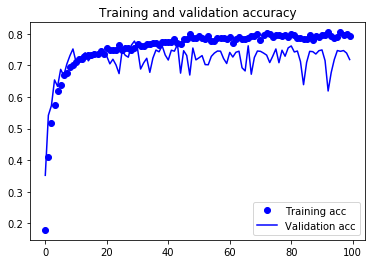

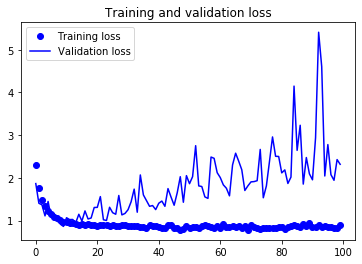

In [14]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.732


In [16]:
# Save the Model
model.save('food_model_11.h5')

### Model #12 (ResNet50 Base Model)

In [12]:
# Build the Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base) 
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 36,697,738
Trainable params: 13,110,026
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 79s 315ms/step - loss: 2.4798 - acc: 0.3851 - val_loss: 1.8713 - val_acc: 0.5925
Epoch 2/100
250/250 [==============================] - 78s 310ms/step - loss: 1.8546 - acc: 0.5625 - val_loss: 1.6621 - val_acc: 0.6575
Epoch 3/100
250/250 [==============================] - 78s 314ms/step - loss: 1.6714 - acc: 0.6267 - val_loss: 1.7454 - val_acc: 0.6615
Epoch 4/100
250/250 [==============================] - 74s 298ms/step - loss: 1.5463 - acc: 0.6569 - val_loss: 1.6302 - val_acc: 0.6885
Epoch 5/100
250/250 [==============================] - 86s 342ms/step - loss: 1.4963 - acc: 0.6739 - val_loss: 1.5859 - val_acc: 0.7005
Epoch 6/100
250/250 [==============================] - 85s 342ms/step - loss: 1.4384 - acc: 0.6836 - val_loss: 1.7282 - val_acc: 0.6845
Epoc

Epoch 59/100
250/250 [==============================] - 74s 297ms/step - loss: 0.7169 - acc: 0.8844 - val_loss: 1.8029 - val_acc: 0.7725
Epoch 60/100
250/250 [==============================] - 74s 294ms/step - loss: 0.7207 - acc: 0.8828 - val_loss: 1.7661 - val_acc: 0.7725
Epoch 61/100
250/250 [==============================] - 73s 294ms/step - loss: 0.7114 - acc: 0.8832 - val_loss: 1.7132 - val_acc: 0.7725
Epoch 62/100
250/250 [==============================] - 74s 294ms/step - loss: 0.7136 - acc: 0.8853 - val_loss: 1.8585 - val_acc: 0.7650
Epoch 63/100
250/250 [==============================] - 74s 298ms/step - loss: 0.6820 - acc: 0.8929 - val_loss: 1.8561 - val_acc: 0.7705
Epoch 64/100
250/250 [==============================] - 74s 296ms/step - loss: 0.6829 - acc: 0.8869 - val_loss: 1.8298 - val_acc: 0.7760
Epoch 65/100
250/250 [==============================] - 73s 294ms/step - loss: 0.6754 - acc: 0.8925 - val_loss: 1.8167 - val_acc: 0.7765
Epoch 66/100
250/250 [===================

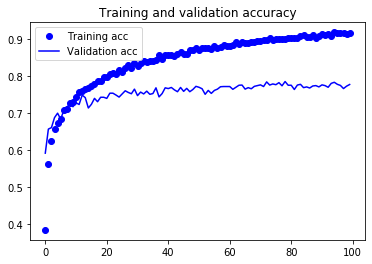

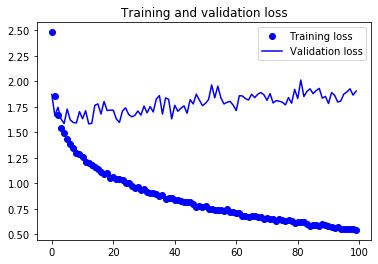

In [15]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.754


In [17]:
# Save the Model
model.save('food_model_12.h5')

### Model #13 (ResNet50 Fine Tuning)

In [3]:
# Build the Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))


model = models.Sequential()
model.add(conv_base) 
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_1_conv':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 36,697,738
Trainable params: 28,086,026
Non-trainable params: 8,611,712
_________________________________________________________________


In [4]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/100
250/250 [==============================] - 206s 825ms/step - loss: 2.7723 - acc: 0.3169 - val_loss: 1.8808 - val_acc: 0.5355
Epoch 2/100
250/250 [==============================] - 74s 298ms/step - loss: 1.9578 - acc: 0.5220 - val_loss: 1.6169 - val_acc: 0.6370
Epoch 3/100
250/250 [==============================] - 75s 300ms/step - loss: 1.7231 - acc: 0.6036 - val_loss: 1.6018 - val_acc: 0.6665
Epoch 4/100
250/250 [==============================] - 76s 304ms/step - loss: 1.5857 - acc: 0.6561 - val_loss: 1.5020 - val_acc: 0.7035
Epoch 5/100
250/250 [==============================] - 76s 305ms/step - loss: 1.4698 - acc: 0.6885 - val_loss: 1.5806 - val_acc: 0.6920
Epoch 6/100
250/250 [==============================] - 76s 305m

Epoch 57/100
250/250 [==============================] - 79s 314ms/step - loss: 0.3965 - acc: 0.9643 - val_loss: 4.0730 - val_acc: 0.7785
Epoch 58/100
250/250 [==============================] - 76s 302ms/step - loss: 0.3866 - acc: 0.9677 - val_loss: 3.8203 - val_acc: 0.7885
Epoch 59/100
250/250 [==============================] - 78s 313ms/step - loss: 0.3728 - acc: 0.9679 - val_loss: 4.1521 - val_acc: 0.7745
Epoch 60/100
250/250 [==============================] - 75s 301ms/step - loss: 0.3764 - acc: 0.9671 - val_loss: 4.0928 - val_acc: 0.7830
Epoch 61/100
250/250 [==============================] - 76s 306ms/step - loss: 0.3711 - acc: 0.9688 - val_loss: 4.1615 - val_acc: 0.7860
Epoch 62/100
250/250 [==============================] - 78s 312ms/step - loss: 0.3656 - acc: 0.9693 - val_loss: 4.1969 - val_acc: 0.7845
Epoch 63/100
250/250 [==============================] - 79s 314ms/step - loss: 0.3478 - acc: 0.9700 - val_loss: 4.3196 - val_acc: 0.7850
Epoch 64/100
250/250 [===================

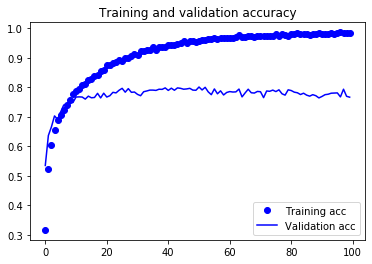

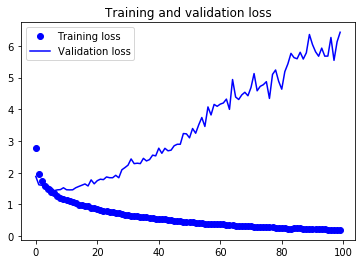

In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.796


In [8]:
# Save the Model
model.save('food_model_13.h5')

### Model #14 (ResNet50 Fine Tuning 2)

In [9]:
# Build the Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base) 
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_1_conv':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               6553728   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 30,142,730
Trainable params: 21,531,018
Non-trainable params: 8,611,712
_________________________________________________________________


In [10]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs= 20, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/20
250/250 [==============================] - 85s 340ms/step - loss: 2.6739 - acc: 0.2437 - val_loss: 1.7784 - val_acc: 0.4805
Epoch 2/20
250/250 [==============================] - 79s 317ms/step - loss: 1.9249 - acc: 0.4323 - val_loss: 1.4374 - val_acc: 0.6080
Epoch 3/20
250/250 [==============================] - 80s 319ms/step - loss: 1.6501 - acc: 0.5455 - val_loss: 1.3768 - val_acc: 0.6570
Epoch 4/20
250/250 [==============================] - 79s 316ms/step - loss: 1.4828 - acc: 0.6003 - val_loss: 1.3199 - val_acc: 0.6880
Epoch 5/20
250/250 [==============================] - 80s 318ms/step - loss: 1.3685 - acc: 0.6419 - val_loss: 1.2693 - val_acc: 0.7040
Epoch 6/20
250/250 [==============================] - 79s 316ms/step - loss: 1.2978 - acc: 0.6691 - val_loss: 1.2398 - val_acc: 0.7235
Epoch 7/20

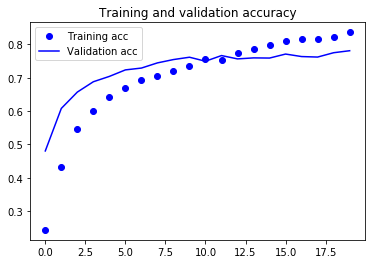

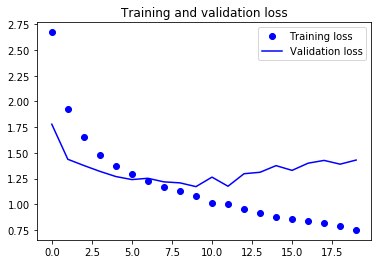

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.788


In [13]:
# Save the Model
model.save('food_model_14.h5')

### Model #15 (ResNet50 Fine Tuning 3)

In [3]:
# Build the Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model = models.Sequential()
model.add(conv_base) 
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv4_block1_1_conv':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6553728   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 30,142,730
Trainable params: 28,639,626
Non-trainable params: 1,503,104
_________________________________________________________________


In [4]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=250,
      epochs= 15, 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 250 steps
Epoch 1/15
250/250 [==============================] - 99s 396ms/step - loss: 2.6424 - acc: 0.2520 - val_loss: 1.7481 - val_acc: 0.5000
Epoch 2/15
250/250 [==============================] - 88s 353ms/step - loss: 1.8770 - acc: 0.4631 - val_loss: 1.3393 - val_acc: 0.6490
Epoch 3/15
250/250 [==============================] - 89s 358ms/step - loss: 1.5422 - acc: 0.5857 - val_loss: 1.2253 - val_acc: 0.6960
Epoch 4/15
250/250 [==============================] - 90s 358ms/step - loss: 1.3520 - acc: 0.6455 - val_loss: 1.1577 - val_acc: 0.7265
Epoch 5/15
250/250 [==============================] - 90s 360ms/step - loss: 1.2444 - acc: 0.6812 - val_loss: 1.1218 - val_acc: 0.7465
Epoch 6/15
250/250 [==============================] - 90s 359ms/step 

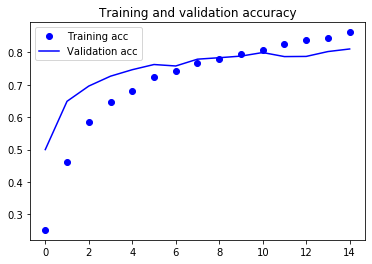

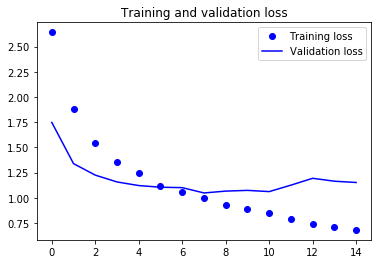

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.834


In [8]:
# Save the Model
model.save('food_model_15.h5')

## Step 4  – Use the best model to make prediction

In [1]:
# Load the model 
from tensorflow.keras import models
model = models.load_model('food_model_9.h5')

In [2]:
# Load the food list (in alphabetical order)
with open('40.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['baklava', 'beef_carpaccio', 'caprese_salad', 'cheesecake', 'creme_brulee', 'hamburger', 'omelette', 'paella', 'peking_duck', 'sushi']


In [3]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
img_size = 150
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

Using TensorFlow backend.


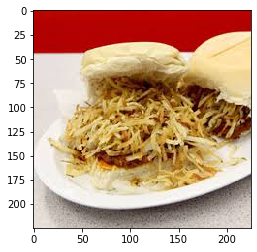

The prediction is:  omelette 

     baklava  beef_carpaccio  caprese_salad  cheesecake  creme_brulee  \
0  0.015875        0.004082        0.00284    0.008221      0.127775   

   hamburger  omelette    paella  peking_duck     sushi  
0   0.043469  0.584928  0.192481     0.015595  0.004734  


In [5]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'hamburger.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

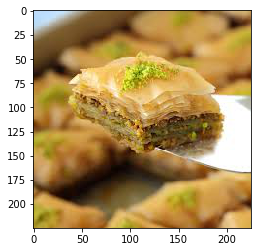

The prediction is:  baklava 

     baklava  beef_carpaccio  caprese_salad  cheesecake  creme_brulee  \
0  0.548715        0.001311       0.001511    0.147167      0.011609   

   hamburger  omelette    paella  peking_duck     sushi  
0   0.056231  0.059375  0.001372     0.092662  0.080047  


In [6]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'baklava.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

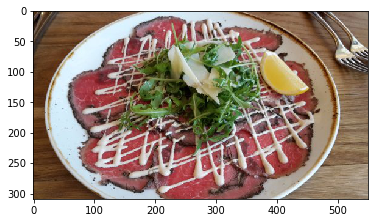

The prediction is:  beef_carpaccio 

    baklava  beef_carpaccio  caprese_salad  cheesecake  creme_brulee  \
0      0.0             1.0            0.0         0.0           0.0   

   hamburger  omelette  paella  peking_duck  sushi  
0        0.0       0.0     0.0          0.0    0.0  


In [7]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'beef-carpaccio.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

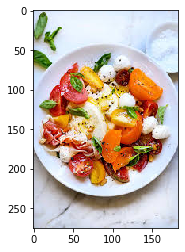

The prediction is:  caprese_salad 

     baklava  beef_carpaccio  caprese_salad  cheesecake  creme_brulee  \
0  0.000002        0.090689       0.867033    0.000091  7.567392e-07   

   hamburger  omelette    paella  peking_duck     sushi  
0   0.000542  0.001312  0.000449     0.000958  0.038923  


In [8]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'caprese-salad.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

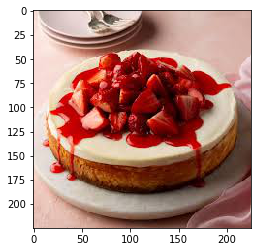

The prediction is:  cheesecake 

     baklava  beef_carpaccio  caprese_salad  cheesecake  creme_brulee  \
0  0.054752        0.013444       0.018785    0.730614      0.023493   

   hamburger  omelette    paella  peking_duck     sushi  
0   0.012451  0.013194  0.000213     0.104211  0.028842  


In [9]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'cheesecake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

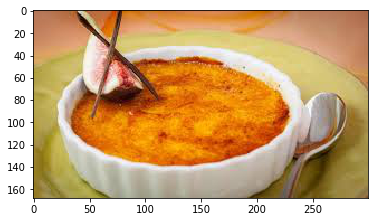

The prediction is:  creme_brulee 

         baklava  beef_carpaccio  caprese_salad    cheesecake  creme_brulee  \
0  1.758742e-21    2.323329e-25   2.281287e-26  1.095050e-17           1.0   

      hamburger      omelette        paella   peking_duck         sushi  
0  2.831313e-23  4.876663e-15  5.362224e-22  1.149116e-21  3.064421e-28  


In [10]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'creme-brulee4.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

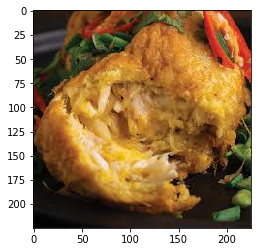

The prediction is:  paella 

     baklava  beef_carpaccio  caprese_salad  cheesecake  creme_brulee  \
0  0.000005        0.000211       0.000695    0.000004      0.000011   

   hamburger  omelette    paella  peking_duck     sushi  
0   0.000346  0.013816  0.981313     0.000067  0.003531  


In [11]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'omelette4.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

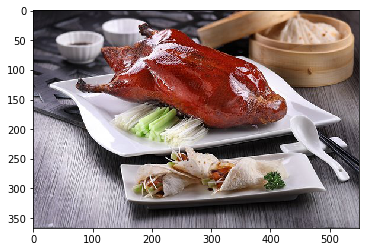

The prediction is:  peking_duck 

         baklava  beef_carpaccio  caprese_salad    cheesecake  creme_brulee  \
0  2.613388e-15    4.770141e-19   1.343662e-23  4.295938e-12  6.730622e-19   

      hamburger      omelette        paella  peking_duck         sushi  
0  2.155265e-15  1.851833e-16  1.511059e-24          1.0  3.744539e-20  


In [12]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'peking-duck.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

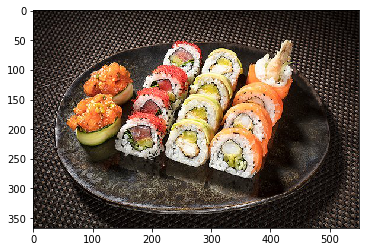

The prediction is:  sushi 

         baklava  beef_carpaccio  caprese_salad    cheesecake  creme_brulee  \
0  2.554842e-33    3.112863e-32   2.074491e-18  4.469786e-31           0.0   

      hamburger      omelette        paella   peking_duck  sushi  
0  1.453662e-27  9.204165e-26  4.235979e-31  4.117138e-28    1.0  


In [13]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'sushi4.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

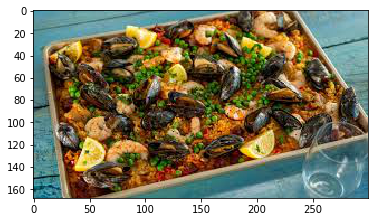

The prediction is:  paella 

         baklava  beef_carpaccio  caprese_salad    cheesecake  creme_brulee  \
0  3.945268e-22    3.686723e-13   2.808527e-10  4.799484e-22  1.815201e-20   

      hamburger      omelette  paella   peking_duck         sushi  
0  1.666305e-15  7.585746e-09     1.0  6.807500e-17  5.700737e-10  


In [14]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'paella4.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)